### Pair Programming Métricas

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:




- Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?



In [85]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### 1. Calculad las métricas para vuestro modelo.

In [86]:
#Cargamos el df con las variables transformadas a int.
df=pd.read_csv('datos/EST_Social_Network_Ads_Aj_int.csv', index_col=0)
df.head()

,age,estimatedsalary,purchased,gender_Female,gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [87]:
# separamos los datos en X e y

X = df.drop("purchased", axis = 1)
y = df["purchased"]

In [88]:
X.head()

,age,estimatedsalary,gender_Female,gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [89]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: purchased, dtype: int64

In [90]:
#separamos los datos de entrenamiento y los datos de prueba: 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo a nuestros datos
log_reg.fit(x_train,y_train)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test)

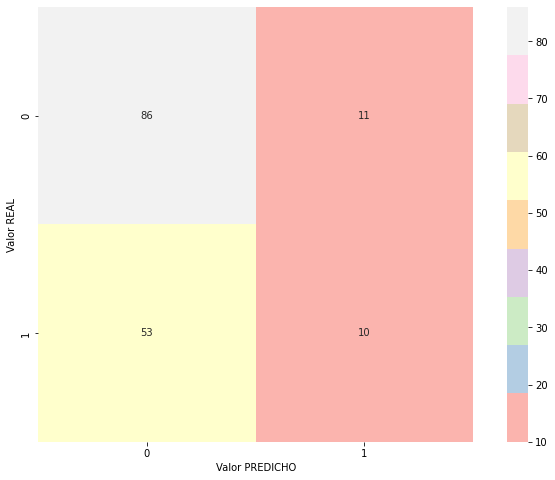

In [91]:
# Generamos nuestra matriz de confusion 
mat_rl = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_rl, square=True, annot=True, fmt="d", cmap = "Pastel1")

plt.xlabel('Valor PREDICHO')
plt.ylabel('Valor REAL')
plt.show();

In [92]:
# Aplicamos una funcion para la obtencion de los valores de las metricas 

def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    
    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [93]:
results_log= metricas(y_test, y_pred_test, y_train, y_pred_train, "R_log")
results_log

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.600000,0.476190,0.158730,0.238095,0.051325,test,R_log
1,0.682813,0.631579,0.215247,0.321070,0.174923,train,R_log


#### Interpretación 

Análisis de los datos obtenidos como resultado de nuestro test:

- *Accuracy*: Nuestro modelo es capaz de acertar el 60% de las veces.

- *Recall* y *Precisión*: Se recogieron un 15% de casos POSITIVOS(Recall), de los cuales un 47% fueron Verdaderos POSITIVOS.

- *Kappa*: La concordancia de los datos de test y train es Muy baja(0.05), por lo tanto diriamos que lo que ha acertado lo ha acertado por azar. 


#### Conclusión 

Para realizar un modelo predictivo con estos datos en Regresion Logistica, tendremos que optar por otros métodos como son: Decision Tree o Random Forest. 

In [94]:
df_sinEst=pd.read_csv('datos/Social_Network_Ads_1.csv',index_col=0)
df_sinEst.head(3)

,gender,age,estimatedsalary,purchased
user_id,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0


Borramos el indice al ser una variable continua con valores unicos y codificamos a valor numerico la variable de genero, para realizar las metricas de los datos sin estandarizar a nuestro modelo.

In [95]:
df_sinEst.reset_index(drop=True, inplace=True)

genero ={'Male':0, 'Female':1}

df_sinEst['gender']= df_sinEst['gender'].map(genero)

In [96]:
df_sinEst['gender'].unique()

array([0, 1])

In [97]:
df_sinEst.head()

,gender,age,estimatedsalary,purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [98]:
Xse = df_sinEst.drop("purchased", axis = 1)
yse = df_sinEst["purchased"]

In [99]:
Xse.head()

,gender,age,estimatedsalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [100]:
yse.head()

0    0
1    0
2    0
3    0
4    0
Name: purchased, dtype: int64

In [101]:
x_train_se, x_test_se, y_train_se, y_test_se = train_test_split(Xse, yse, test_size = 0.2, random_state = 42)

In [102]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg_se = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_se.fit(x_train_se,y_train_se)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_se = log_reg_se.predict(x_train_se)

# obtenemos las predicciones para el conjunto de test
y_pred_test_se = log_reg_se.predict(x_test_se)

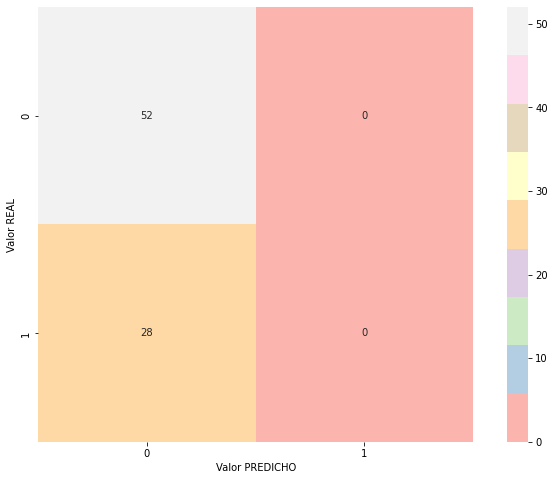

In [103]:
# Generamos nuestra matriz de confusion 
mat_rl_se = confusion_matrix(y_test_se, y_pred_test_se)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_rl_se, square=True, annot=True, fmt="d", cmap = "Pastel1")

plt.xlabel('Valor PREDICHO')
plt.ylabel('Valor REAL')
plt.show();

In [104]:
results_log_se= metricas(y_test_se, y_pred_test_se, y_train_se, y_pred_train_se, "R_log_se")
results_log_se

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.650000,0.0,0.0,0.0,0.0,test,R_log_se
1,0.640625,0.0,0.0,0.0,0.0,train,R_log_se
